In [3]:
import numpy as np
from scipy.interpolate import griddata
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter
# from scipy.misc import imsave
import imageio
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh, Mode
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d.axes3d import get_test_data

from scipy.io import netcdf

In [11]:
socal = netcdf.NetCDFFile('/home/msit/Desktop/southern_calif_crm_v1.nc')
temp = socal.variables.keys()
xog = socal.variables['x'][:]
yog = socal.variables['y'][:]
zog = socal.variables['z'][:]

loc1 = [32.858, -117.466]
loc2 = [32.858, -117.265]
loc3 = [32.66, -117.265]
loc4 = [32.66, -117.466]
places = np.array([loc1, loc2, loc3, loc4])

min_lon = min(places[:,1])
max_lon = max(places[:,1])
xfilter = np.argwhere((xog <= max_lon) & (xog >= min_lon))
xclip = xog[xfilter].flatten()

min_lat = min(places[:,0])
max_lat = max(places[:,0])
yfilter = np.argwhere((yog >= min_lat) & (yog<= max_lat))
yclip = yog[yfilter].flatten()

x, y = np.meshgrid(xclip, yclip)
z = zog[yfilter[0]:yfilter[-1]+1, xfilter[0]:xfilter[-1]+1].flatten()

# z = zog[792:1006, 10280:10389].flatten()

/usr/lib/python3/dist-packages/scipy/io/netcdf.py:297: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)
/home/msit/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


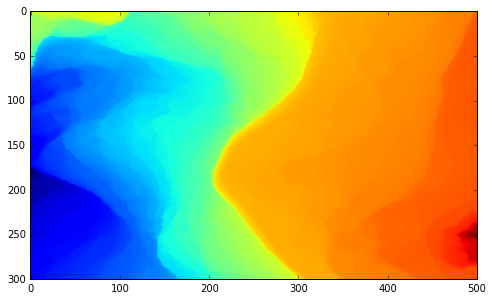

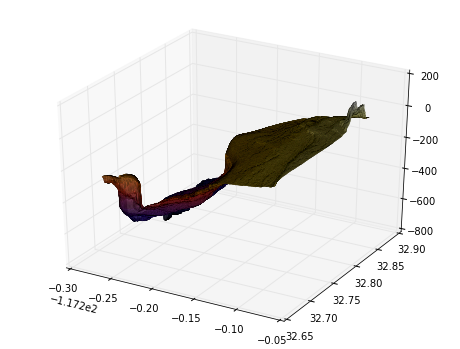

In [13]:
# Generating the surface
# x, y, z = get_test_data(delta=0.1)
# x += 30
# y += 30
# z = z_edit


# Scale the surface for this example
# z *= 0.05
# Remember that Gazebo uses ENU (east-north-up) convention, so underwater
# the Z coordinate will be negative
# z -= 3
# Note: Gazebo will import your mesh in meters. 

# Point clouds usually don't come in nice grids, so let's make it a (N, 3)
# matrix just to show how it can be done. If you have outliers or noise, you should
# treat those values now.
# xyz = np.zeros(shape=(x.size, 3))
xyz = np.zeros(shape=(z.shape[0], 3))
xyz[:, 0] = x.flatten()
xyz[:, 1] = y.flatten()
xyz[:, 2] = z.flatten()

# Generate a grid for the X and Y coordinates, change the number of points
# to your needs. Large grids can generate files that are too big for Gazebo, so
# be careful when choosing the resolution of your grid.
x_grid, y_grid = np.meshgrid(np.linspace(xyz[:, 0].min(), xyz[:, 0].max(), 500),
                             np.linspace(xyz[:, 1].min(), xyz[:, 1].max(), 300))

# Interpolate over the point cloud for our grid
z_grid = griddata(xyz[:, 0:2], xyz[:, 2], (x_grid, y_grid),
                  method='linear')

# Option to treat noise
#z_grid = gaussian_filter(z_grid, sigma=1)

# Show the resulting heightmap as an image
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.imshow(z_grid)

# Flatten our interpolated data for triangulation
output = np.zeros(shape=(x_grid.size, 3))
output[:, 0] = x_grid.flatten()
output[:, 1] = y_grid.flatten()
output[:, 2] = z_grid.flatten()

# Triangulation of the interpolated data
tri = mtri.Triangulation(output[:, 0], output[:, 1])

# Show the resulting surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(tri, output[:, 2], cmap=plt.cm.CMRmap, shade=True, linewidth=0.1)
# ax.axis('equal')

# # Create the mesh object
# seabed_mesh = mesh.Mesh(np.zeros(tri.triangles.shape[0], dtype=mesh.Mesh.dtype))

# # Set the vectors
# for i, f in enumerate(tri.triangles):
#     for j in range(3):
#         seabed_mesh.vectors[i][j] = output[f[j]]

# # Store the seabed as a STL file
# seabed_mesh.save('lajolla.stl')

plt.show()

In [12]:
print (z)
print (z*0.05)

print (z_test)
print (z_test*0.05)
print ((z_test*0.05)-3)

[-164.7 -164.8 -164.8 ...  -91.7  -91.7  -91.2]
[-8.235    -8.240001 -8.240001 ... -4.585    -4.585    -4.56    ]
[[-0.00982064 -0.01319036 -0.01754004 ... -0.023092   -0.01754004
  -0.01319036]
 [-0.01319036 -0.01771632 -0.02355849 ... -0.03101548 -0.02355849
  -0.01771632]
 [-0.01754004 -0.02355849 -0.03132719 ... -0.0412432  -0.03132719
  -0.02355849]
 ...
 [-0.01373043 -0.01985735 -0.02800271 ...  0.11812427  0.11827665
   0.11591304]
 [-0.01289122 -0.01801753 -0.02475215 ...  0.04437913  0.04788803
   0.04940405]
 [-0.01097235 -0.01507265 -0.02042145 ...  0.00983613  0.01423619
   0.01709512]]
[[-0.00049103 -0.00065952 -0.000877   ... -0.0011546  -0.000877
  -0.00065952]
 [-0.00065952 -0.00088582 -0.00117792 ... -0.00155077 -0.00117792
  -0.00088582]
 [-0.000877   -0.00117792 -0.00156636 ... -0.00206216 -0.00156636
  -0.00117792]
 ...
 [-0.00068652 -0.00099287 -0.00140014 ...  0.00590621  0.00591383
   0.00579565]
 [-0.00064456 -0.00090088 -0.00123761 ...  0.00221896  0.0023944
  